# **Project: anomalous diffusion model with molecular crowding porosity**

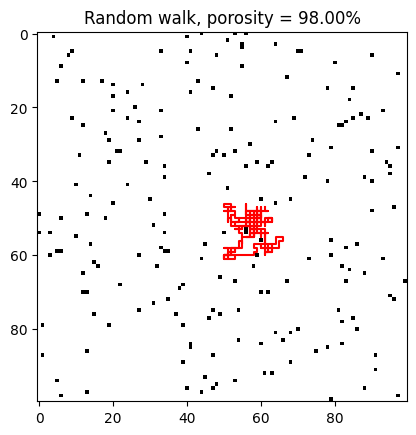

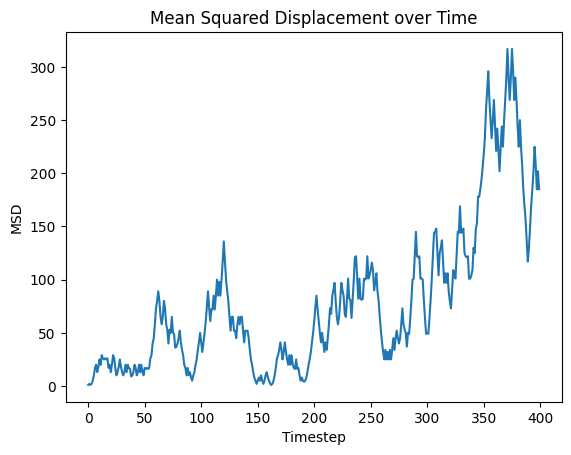

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Parameters
size = 100
crowding = 0.02
obstacle_size = 1
steps = 400

def create_square(size, crowding, obstacle_size=1):
    assert 0.0 <= crowding <= 1.0, "crowding must be in [0, 1]"
    if obstacle_size != 1:
        raise ValueError("This exact-porosity method assumes obstacle_size == 1")

    N = size * size
    k = int(round(crowding * N))  # use round, not truncation

    # pick k unique linear indices
    idx = np.random.choice(N, size=k, replace=False)

    # fill grid
    square = np.zeros(N, dtype=np.uint8)
    square[idx] = 1
    square = square.reshape(size, size)

    # occupied % (It returns as 'percentage' below)
    crowding_pctng = 100.0 * k / N
    return square, crowding_pctng

def twoD_random_walk(square, steps):
    # find starting point in free space
    while True:
        x = random.randint(0, square.shape[0] - 1)
        y = random.randint(0, square.shape[1] - 1)
        if square[x, y] == 0:
            break

    x0, y0 = x, y
    positions = [(x, y)]
    msd_values = []

    for _ in range(steps):
        dx, dy = random.choice([(0,1), (0,-1), (1,0), (-1,0)])
        new_x, new_y = x + dx, y + dy

        if (0 <= new_x < square.shape[0] and
            0 <= new_y < square.shape[1] and
            square[new_x, new_y] == 0):
            x, y = new_x, new_y

        positions.append((x, y))
        msd = (x - x0)**2 + (y - y0)**2
        msd_values.append(msd)
    return positions, msd_values

# Run simulation
square, percentage = create_square(size, crowding, obstacle_size)
positions, msd_values = twoD_random_walk(square, steps)

# Plot trajectory
plt.imshow(1 - square, cmap='gray')
plt.plot([pos[1] for pos in positions], [pos[0] for pos in positions], color='red')
plt.title("Random walk, porosity = {:.2f}%".format(100 - percentage))
plt.savefig("grid.pdf")
#files.download('grid.pdf')
plt.show()

# Plot MSD
plt.plot(msd_values)
plt.title("Mean Squared Displacement over Time")

plt.xlabel("Timestep")
plt.ylabel("MSD")

plt.show()

# **Average MSDs at varying porosities**

In [ ]:
# Parameters
size = 100
crowding = 0.02
obstacle_size = 1
steps = 400
n_runs = 10000


# Create a 2D grid with obstacles; return actual POROSITY (%)
def create_square(size, crowding, obstacle_size=1):
    # Guarantees exact occupancy = round(crowding * N) cells when obstacle_size == 1
    N = size * size
    k = int(round(crowding * N))
    idx = np.random.choice(N, size=k, replace=False)
    square = np.zeros(N, dtype=np.uint8)
    square[idx] = 1
    square = square.reshape(size, size)
    # exact porosity from exact occupancy
    porosity_pct = 100.0 * (1.0 - k / N)
    return square, porosity_pct

    # compute actual occupied area and porosity
    occupied = np.sum(square == 1)
    total = size * size
    porosity_pct = 100.0 * (1.0 - occupied / total)  # fraction of free space in %
    return square, porosity_pct

# redefining twoD_random_walk so as to only return msd_values:
def twoD_random_walk(square, steps):
    # start at a random free site
    while True:
        x = random.randint(0, square.shape[0] - 1)
        y = random.randint(0, square.shape[1] - 1)
        if square[x, y] == 0:
            break

    x0, y0 = x, y
    msd_values = []

    for _ in range(steps):
        dx, dy = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
        new_x, new_y = x + dx, y + dy
        if 0 <= new_x < square.shape[0] and 0 <= new_y < square.shape[1] and square[new_x, new_y] == 0:
            x, y = new_x, new_y
        msd = (x - x0)**2 + (y - y0)**2
        msd_values.append(msd)

    return msd_values

# ------------!
# condensed single function to plot multiple porosities on single graph

def msds_poros(crowd, nruns):
    '''takes crowding parameter and number of runs and returns
    corresponding msds with porosity percentage'''
    all_msd = np.zeros(steps)
    porosity_accum = 0.0
    for i in range(nruns):
        square, porosity_pct = create_square(size, crowd, obstacle_size)
        msd = twoD_random_walk(square, steps)
        all_msd += np.array(msd)
        porosity_accum += porosity_pct

    avg_msd = all_msd / nruns
    avg_porosity_pct = porosity_accum / nruns
    return avg_msd, avg_porosity_pct


msd_98, crd_2 = msds_poros(crowding, n_runs)
#msd_90, crd_10 = msds_poros(0.1, n_runs)
#msd_85, crd_15 = msds_poros(0.15, n_runs)
#msd_80, crd_20 = msds_poros(0.2, n_runs)
#msd_70, crd_30 = msds_poros(0.3, n_runs)
#msd_60, crd_40 = msds_poros(0.4, n_runs)
#msd_45, crd_55 = msds_poros(0.55, n_runs)

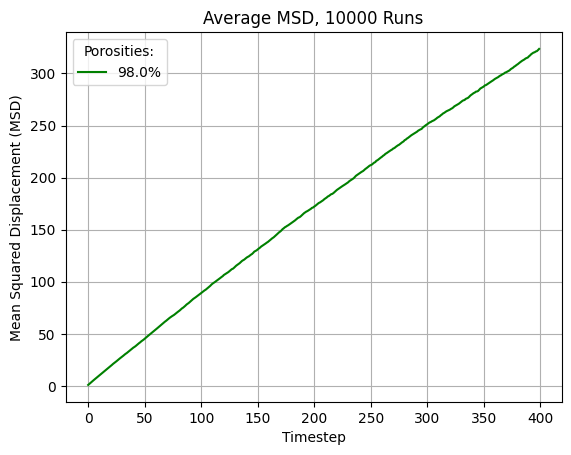

In [ ]:
# plotting
plt.plot(msd_98, label= str(crd_2)+'%', c = 'green')
#plt.plot(msd_90, label= str(crd_10)+'%')
#plt.plot(msd_85, label= str(crd_15)+'%')
#plt.plot(msd_80, label= str(crd_20)+'%')
#plt.plot(msd_70, label= str(crd_30)+'%')
#plt.plot(msd_60, label= str(crd_40)+'%')
#plt.plot(msd_45, label= '45.0%')


plt.legend(title = 'Porosities:')
plt.title(f"Average MSD, {n_runs} Runs")
plt.xlabel("Timestep")
plt.ylabel("Mean Squared Displacement (MSD)")
plt.grid(True)
plt.savefig('msd_45_98.pdf')
#files.download('msd_45_98.pdf')
plt.show()


# Log-log plots (9/11/25)

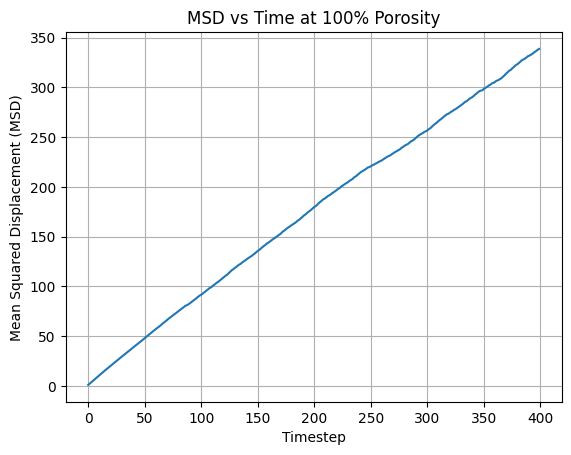

In [ ]:
# Parameters
size = 100
steps = 400

# no crowding
n_runs = 10000
msd_100, crd_0 = msds_poros(0, n_runs)

# ------ -MSD vs time
plt.plot(msd_100, label= str(crd_0)+'%')
plt.title("MSD vs Time at 100% Porosity")
plt.xlabel("Timestep")
plt.ylabel("Mean Squared Displacement (MSD)")
plt.grid(True)



Above calculation conducted five times yields an alpha value of:0.9629942709152302 +/- 0.0032329100790212954


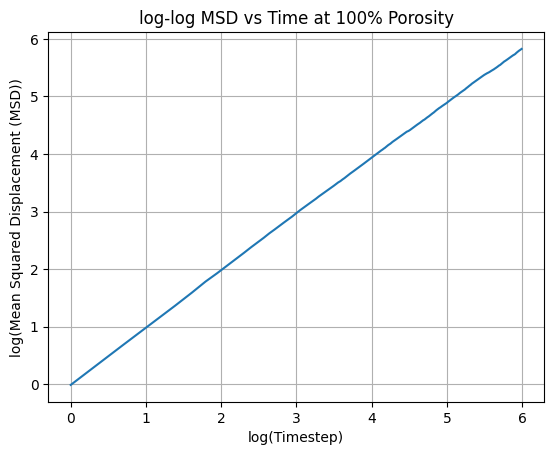

In [ ]:
# ---- log-log plot
from scipy.stats import linregress

t = np.arange(1, steps + 1, dtype=float)
x, y = np.log(t), np.log(msd_100)


plt.plot(x, y)
plt.title("log-log MSD vs Time at 100% Porosity")
plt.xlabel("log(Timestep)")
plt.ylabel("log(Mean Squared Displacement (MSD))")
plt.grid(True)

# alpha calculations
alpha_values = []
rep_runs = 5
n_runs = 10000

for rep in range(rep_runs):

    msd_100, crd_0 = msds_poros(0, n_runs)
    t = np.arange(1, steps + 1, dtype=float)
    x, y = np.log(t), np.log(msd_100)

    slope, intercept, *_ = linregress(x, (y + 1e-12))
    alpha_values.append(slope)

alpha_values = np.array(alpha_values)
mean_alpha = alpha_values.mean()
err_alpha = alpha_values.std(ddof=1)  # std across reps (unbiased)


print("Above calculation conducted five times yields an alpha value of:" + str(mean_alpha) + " +/- " + str(err_alpha))

# **Log-log alpha calculation**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

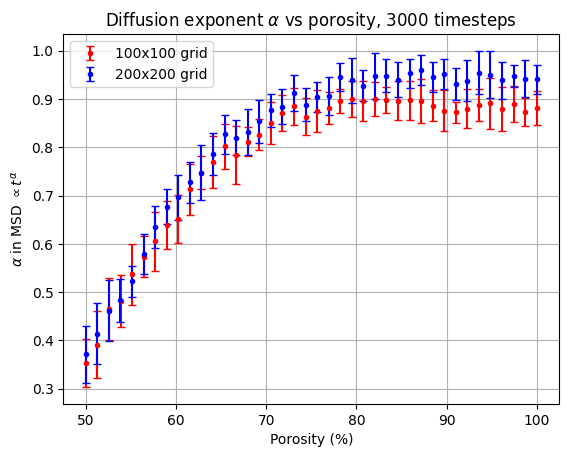

In [ ]:
from scipy.stats import linregress

size = 100
steps = 3000
n_runs = 100
n_reps = 15 # independent repeats for error bars
crowding_levels = np.linspace(0, 0.5, 40)  # occupied fractions

np.random.seed(0)
random.seed(0)

alpha_reps = []
porosity_reps = []

for rep in range(n_reps):
    alpha_values = []
    porosity_values = []
    for crowding in crowding_levels:
        all_msd = np.zeros(steps, dtype=float)
        por_accum = 0.0

        for _ in range(n_runs):
            grid, occupied_pct = create_square(size, crowding, obstacle_size=1)
            por_accum += occupied_pct  # porosity %
            all_msd += np.array(twoD_random_walk(grid, steps), dtype=float)

        avg_porosity = por_accum / n_runs
        avg_msd = all_msd / n_runs

        # log–log fit to get alpha
        t = np.arange(1, steps + 1, dtype=float)
        slope, intercept, *_ = linregress(np.log(t), np.log(avg_msd + 1e-12))
        alpha_values.append(slope)
        porosity_values.append(avg_porosity)

    alpha_reps.append(np.array(alpha_values))
    porosity_reps.append(np.array(porosity_values))

alpha_reps = np.array(alpha_reps)
porosity_reps = np.array(porosity_reps)

# Means and error bars across reps
mean_alpha = alpha_reps.mean(axis=0)
err_alpha  = alpha_reps.std(axis=0, ddof=1)   # std across reps (unbiased)
mean_porosity = porosity_reps.mean(axis=0)

# Sort by porosity for a tidy curve
order = np.argsort(mean_porosity)
x = mean_porosity[order]
y = mean_alpha[order]
yerr = err_alpha[order]





# 200 by 200 grid:
size2 = 200

np.random.seed(0)
random.seed(0)

alpha_reps = []
porosity_reps = []

for rep in range(n_reps):
    alpha_values = []
    porosity_values = []
    for crowding in crowding_levels:
        all_msd = np.zeros(steps, dtype=float)
        por_accum = 0.0

        for _ in range(n_runs):
            grid, occupied_pct = create_square(size2, crowding, obstacle_size=1) # size2= 200x200
            por_accum += occupied_pct  # porosity %
            all_msd += np.array(twoD_random_walk(grid, steps), dtype=float)

        avg_porosity = por_accum / n_runs
        avg_msd = all_msd / n_runs

        # log–log fit to get alpha
        t = np.arange(1, steps + 1, dtype=float)
        slope, intercept, *_ = linregress(np.log(t), np.log(avg_msd + 1e-12))
        alpha_values.append(slope)
        porosity_values.append(avg_porosity)

    alpha_reps.append(np.array(alpha_values))
    porosity_reps.append(np.array(porosity_values))

alpha_reps = np.array(alpha_reps)
porosity_reps = np.array(porosity_reps)

# Means and error bars across reps
mean_alpha = alpha_reps.mean(axis=0)
err_alpha  = alpha_reps.std(axis=0, ddof=1)   # std across reps (unbiased)
mean_porosity = porosity_reps.mean(axis=0)

# Sort by porosity for a tidy curve
order = np.argsort(mean_porosity)
x2 = mean_porosity[order]
y2 = mean_alpha[order]
yerr2 = err_alpha[order]



# ---- PLOTTING:

plt.errorbar(
    x, y, yerr=yerr,
    fmt='.',
    color='red',
    mfc='red', mec='red',
    ecolor='red',
    capsize=3,
    zorder=3, label = '100x100 grid'
)

plt.errorbar(
    x2, y2, yerr=yerr2,
    fmt='.',
    color='blue',
    mfc='blue', mec='blue',
    ecolor='blue',
    capsize=3,
    zorder=3, label = '200x200 grid'
)
plt.xlabel('Porosity (%)')
plt.ylabel(r'$\alpha$ in MSD $\propto t^\alpha$')
plt.title(r'Diffusion exponent $\alpha$ vs porosity, 3000 timesteps')
plt.grid(True)
plt.legend()
plt.savefig('alpha_por_3000.pdf')
files.download('alpha_por_3000.pdf')






In [ ]:
# critical porosity check:
for i in range(len(x)):
  if y[i]+yerr[i] < 0.9:
    print(x[i])

50.0
51.28
52.560000000000066
53.85000000000003
55.1300000000001
56.40999999999994
57.689999999999934
58.97000000000002
60.26000000000013
61.53999999999997
62.81999999999994
64.10000000000011
65.3800000000001
66.67000000000006
67.94999999999985
69.22999999999982
70.51000000000019
71.78999999999998
73.07999999999994
